# Logistic Regression Example

## <span style="font-size:25px">Loading a Training data</span>

In [3]:
# Colab의 /content/gdrive/에 Google Drive 마운트 시킴

from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
import os

working_dir = 'dataset'

# Google Drive에서 Google Default Directory
colab_default_dir = "/content/gdrive/MyDrive/Colab Notebooks/TF2x_git_commit_file/TF2.x_YouTube/data"

original_dir = os.getcwd()    # save current dir(현재 경로 확인)

try:

  os.chdir(colab_default_dir)     # 현재 경로를 내가 정한 경로로 변경하는 메소드

  if not os.path.exists(working_dir): # "'dataset'이 없으면 알려라."
    #os.mkdir(working_dir)    # 'dataset'라는 이름의 폴더 만들기

    #os.chdir(working_dir)   # change working dir
    print("current dir =", os.getcwd())

except Exception as err:

  os.chdir(original_dir)
  print(str(err))

In [9]:
import numpy as np

try:
  loaded_data = np.loadtxt('./diabetes.csv', delimiter=',')

  x_data = loaded_data[:, 0:-1]
  t_data = loaded_data[:, [-1]]

  print("x_data.shape =", x_data.shape, ", t_data.shape =", t_data.shape)

except Exception as err:

  print(str(err))

x_data.shape = (759, 8) , t_data.shape = (759, 1)


## <span style="font-size:25px">Building and compiling</span>

In [11]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

print(tf.__version__)

2.17.1


In [13]:
model = Sequential()

model.add(Dense(t_data.shape[1],
                input_shape=(x_data.shape[1], ), activation='sigmoid'))

In [14]:
model.compile(optimizer=SGD(learning_rate=1e-2),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

## <span style="font-size:25px">Training and predict</span>

In [15]:
hist = model.fit(x_data,
                 t_data,
                 epochs=500,
                 validation_split=0.2,      # overfiting 확인
                 verbose=2)

Epoch 1/500
19/19 - 2s - 86ms/step - accuracy: 0.6474 - loss: 0.6730 - val_accuracy: 0.6382 - val_loss: 0.6754
Epoch 2/500
19/19 - 0s - 4ms/step - accuracy: 0.6474 - loss: 0.6709 - val_accuracy: 0.6382 - val_loss: 0.6734
Epoch 3/500
19/19 - 0s - 3ms/step - accuracy: 0.6474 - loss: 0.6690 - val_accuracy: 0.6382 - val_loss: 0.6714
Epoch 4/500
19/19 - 0s - 4ms/step - accuracy: 0.6458 - loss: 0.6671 - val_accuracy: 0.6382 - val_loss: 0.6694
Epoch 5/500
19/19 - 0s - 3ms/step - accuracy: 0.6458 - loss: 0.6652 - val_accuracy: 0.6382 - val_loss: 0.6675
Epoch 6/500
19/19 - 0s - 7ms/step - accuracy: 0.6458 - loss: 0.6633 - val_accuracy: 0.6382 - val_loss: 0.6657
Epoch 7/500
19/19 - 0s - 3ms/step - accuracy: 0.6458 - loss: 0.6615 - val_accuracy: 0.6316 - val_loss: 0.6639
Epoch 8/500
19/19 - 0s - 4ms/step - accuracy: 0.6458 - loss: 0.6597 - val_accuracy: 0.6316 - val_loss: 0.6621
Epoch 9/500
19/19 - 0s - 4ms/step - accuracy: 0.6458 - loss: 0.6580 - val_accuracy: 0.6316 - val_loss: 0.6604
Epoch 10/

In [16]:
model.evaluate(x_data, t_data)    # 기본 batch_size = 32 이므로 총 24회 반복 (759 / 24 = 23.7)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7559 - loss: 0.5022


[0.48310521245002747, 0.7667984366416931]

## <span style="font-size:25px">Trend</span>

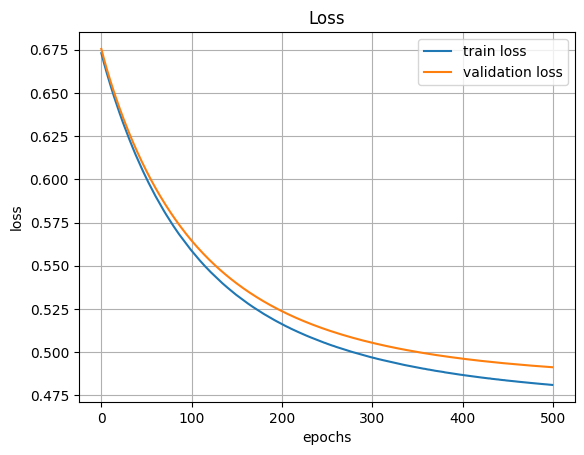

In [17]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

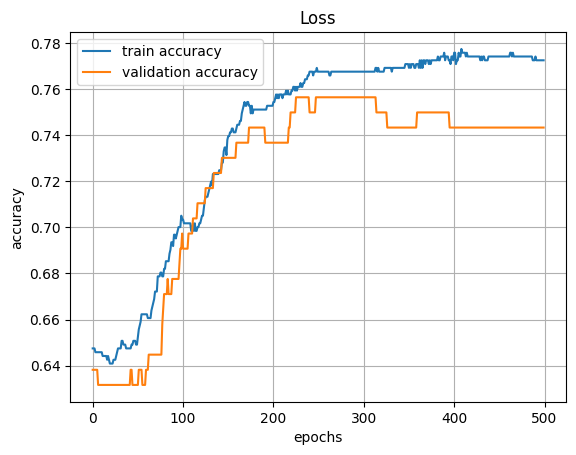

In [20]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()